# Caso Practico 2: Modelo de detección de imágenes

## 1 Analisis y transformacion de datos

### 1.1 Descarga datos

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [ ]:
# Cargar el conjunto de datos MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Mostrar las dimensiones de los datos cargados
print("Dimensiones de los datos de entrenamiento:")
print("Imágenes:", x_train.shape)
print("Etiquetas:", y_train.shape)

print("\nDimensiones de los datos de prueba:")
print("Imágenes:", x_test.shape)
print("Etiquetas:", y_test.shape)

Dimensiones de los datos de entrenamiento:
Imágenes: (60000, 28, 28)
Etiquetas: (60000,)

Dimensiones de los datos de prueba:
Imágenes: (10000, 28, 28)
Etiquetas: (10000,)


### 1.2 Visualizar múltiples muestras de dígitos



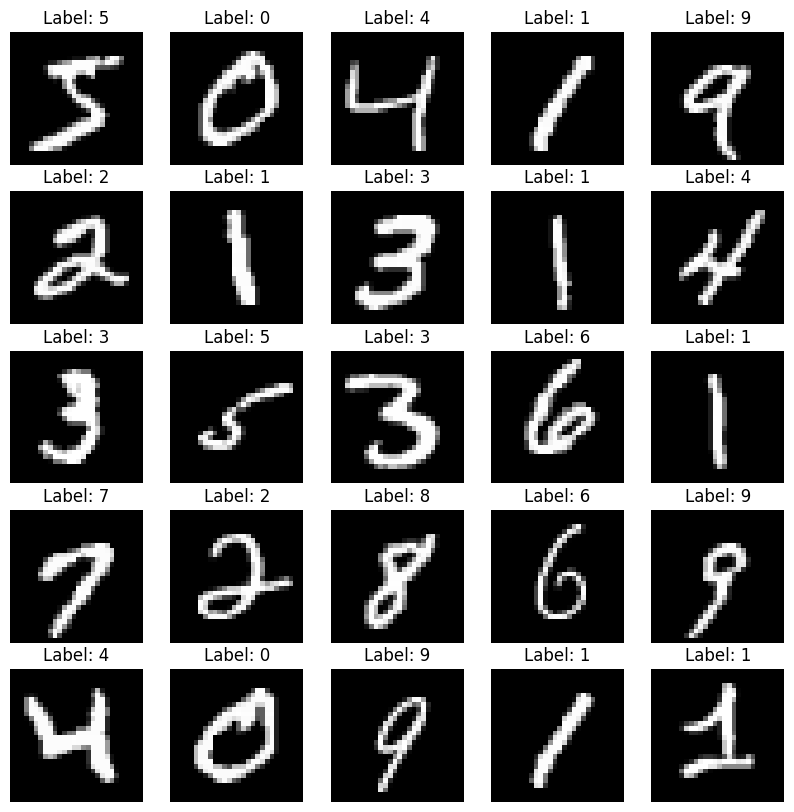

In [ ]:
# Función para visualizar un lote de imágenes
def plot_images(images, labels, nrows=5, ncols=5):
    fig, axes = plt.subplots(nrows, ncols, figsize=(10, 10))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='gray')
        ax.set_title(f"Label: {labels[i]}")
        ax.axis('off')
    plt.show()

# Visualizar las primeras 25 imágenes de entrenamiento
plot_images(x_train, y_train)

### 1.3 Agrupar imágenes por clase y observar la frecuencia

In [ ]:
# Contar la frecuencia de cada dígito
unique_labels, counts = np.unique(y_train, return_counts=True)

# Imprimir las frecuencias
for label, count in zip(unique_labels, counts):
    print(f"Dígito {label}: {count} imágenes")

Dígito 0: 5923 imágenes
Dígito 1: 6742 imágenes
Dígito 2: 5958 imágenes
Dígito 3: 6131 imágenes
Dígito 4: 5842 imágenes
Dígito 5: 5421 imágenes
Dígito 6: 5918 imágenes
Dígito 7: 6265 imágenes
Dígito 8: 5851 imágenes
Dígito 9: 5949 imágenes


### 1.4 Utilizar histogramas para analizar la distribución de clases

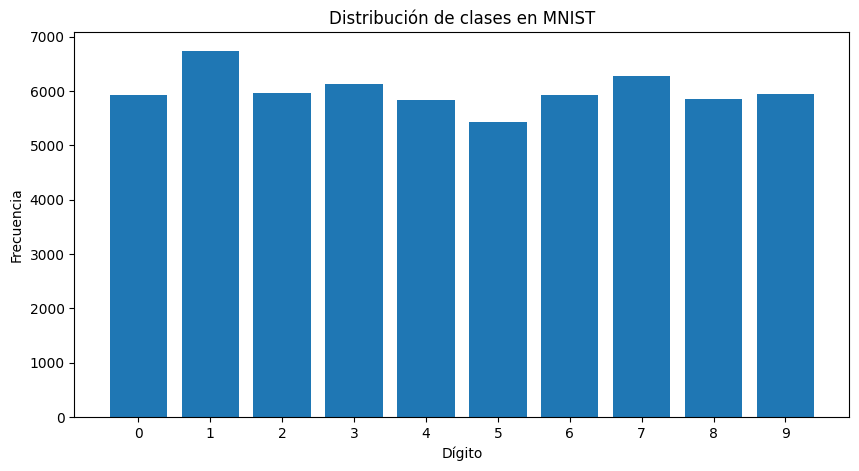

¡Advertencia! Posible desbalance en las clases.


In [ ]:
# Crear un histograma de la distribución de clases
plt.figure(figsize=(10, 5))
plt.bar(unique_labels, counts)
plt.xticks(unique_labels)
plt.xlabel("Dígito")
plt.ylabel("Frecuencia")
plt.title("Distribución de clases en MNIST")
plt.show()

# Verificar si hay desbalance
if np.std(counts) > 100:  # Umbral arbitrario para detectar desbalance
    print("¡Advertencia! Posible desbalance en las clases.")
else:
    print("Las clases parecen estar balanceadas.")

### 1.5  Detectar posibles anomalías o sesgos

In [ ]:
import tensorflow as tf
import numpy as np
import os

def find_anomalies(images, labels):
    anomalies = []
    for i, img in enumerate(images):
        is_anomaly = False
        anomaly_types = []  # Lista para guardar los tipos de anomalías

        # Baja calidad (borrosas)
        if np.var(img) < 100:
            is_anomaly = True
            anomaly_types.append("Baja Calidad")

        # Píxeles corruptos (valores atípicos)
        if np.max(img) > 250:
            is_anomaly = True
            anomaly_types.append("Pixeles Corruptos")

        # Mal centradas
        try:
            # Calcular el centro de masa a lo largo de cada eje
            center_of_mass_x = np.average(np.arange(28), weights=img.sum(axis=0))
            center_of_mass_y = np.average(np.arange(28), weights=img.sum(axis=1))

            if abs(center_of_mass_x - 14) > 5 or abs(center_of_mass_y - 14) > 5:
                is_anomaly = True
                anomaly_types.append("Mal Centrada")
        except ZeroDivisionError:
            is_anomaly = True
            anomaly_types.append("ZeroDivisionError")

        if is_anomaly:
            anomalies.append((i, anomaly_types))

    return anomalies

# Cargar el conjunto de datos MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Encontrar anomalías en el conjunto de entrenamiento
anomalies_train = find_anomalies(x_train, y_train)

# Guardar las anomalías en un archivo de texto
output_file = "anomalies_mnist.txt"

with open(output_file, "w") as f:
    f.write("Anomalías encontradas en el conjunto de entrenamiento de MNIST:\n\n")
    for index, anomaly_types in anomalies_train:
        f.write(f"Índice: {index}, Tipos de anomalía: {', '.join(anomaly_types)}, Etiqueta: {y_train[index]}\n")

print(f"Se encontraron {len(anomalies_train)} anomalías. Los detalles se han guardado en '{output_file}'.")

Se encontraron 60000 anomalías. Los detalles se han guardado en 'anomalies_mnist.txt'.


### 1.6 Redimensionar datos

In [ ]:
# Normalizar los datos
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Mostrar las dimensiones de los datos normalizados
print("Dimensiones de los datos de entrenamiento normalizados:")
print("Imágenes:", x_train.shape)
print("Etiquetas:", y_train.shape)

print("\nDimensiones de los datos de prueba normalizados:")
print("Imágenes:", x_test.shape)
print("Etiquetas:", y_test.shape)

Dimensiones de los datos de entrenamiento normalizados:
Imágenes: (60000, 28, 28)
Etiquetas: (60000,)

Dimensiones de los datos de prueba normalizados:
Imágenes: (10000, 28, 28)
Etiquetas: (10000,)


In [ ]:
### 1.7 Conversión de Formatos

In [ ]:
import tensorflow as tf
import numpy as np

# Agregar la dimensión del canal
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Mostrar las dimensiones de los datos convertidos
print("Dimensiones de los datos de entrenamiento convertidos:")
print(x_train.shape)

print("\nDimensiones de los datos de prueba convertidos:")
print(x_test.shape)


Dimensiones de los datos de entrenamiento convertidos:
(60000, 28, 28, 1)

Dimensiones de los datos de prueba convertidos:
(10000, 28, 28, 1)


## 2 Entrenamiento Modelo

### 2.1 Division Train-Validation-Test

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np

# Dividir el conjunto de entrenamiento en entrenamiento y validación
x_train, x_val, y_train, y_val = train_test_split(
x_train, y_train, test_size=0.3, stratify=y_train, random_state=42
)

# Dividir el conjunto de validación en validación y prueba
x_val, x_test, y_val, y_test = train_test_split(
x_val, y_val, test_size=0.5, stratify=y_val, random_state=42
)

# Imprimir las dimensiones de los conjuntos resultantes
print("Dimensiones del conjunto de entrenamiento:")
print("Imágenes:", x_train.shape)
print("Etiquetas:", y_train.shape)

print("\nDimensiones del conjunto de validación:")
print("Imágenes:", x_val.shape)
print("Etiquetas:", y_val.shape)

print("\nDimensiones del conjunto de prueba:")
print("Imágenes:", x_test.shape)
print("Etiquetas:", y_test.shape)

# Verificar la distribución de clases en cada conjunto
print("\nDistribución de clases en el conjunto de entrenamiento:")
print(np.unique(y_train, return_counts=True))

print("\nDistribución de clases en el conjunto de validación:")
print(np.unique(y_val, return_counts=True))

print("\nDistribución de clases en el conjunto de prueba:")
print(np.unique(y_test, return_counts=True))

print("\nDivisión del conjunto de datos completada.")

Dimensiones del conjunto de entrenamiento:
Imágenes: (42000, 28, 28, 1)
Etiquetas: (42000,)

Dimensiones del conjunto de validación:
Imágenes: (9000, 28, 28, 1)
Etiquetas: (9000,)

Dimensiones del conjunto de prueba:
Imágenes: (9000, 28, 28, 1)
Etiquetas: (9000,)

Distribución de clases en el conjunto de entrenamiento:
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([4146, 4719, 4171, 4292, 4089, 3795, 4143, 4385, 4096, 4164]))

Distribución de clases en el conjunto de validación:
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([ 889, 1012,  894,  919,  876,  813,  887,  940,  878,  892]))

Distribución de clases en el conjunto de prueba:
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([ 888, 1011,  893,  920,  877,  813,  888,  940,  877,  893]))

División del conjunto de datos completada.


### 2.3 Arquietectura

Ventajas:

*   La normalización por lotes (BatchNormalization) puede acelerar el entrenamiento y mejorar la estabilidad del modelo.
*   El dropout puede ayudar a prevenir el sobreajuste al desactivar aleatoriamente algunas neuronas durante el entrenamiento.

Desventajas:

*   Aumenta ligeramente la complejidad del modelo.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = tf.keras.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),  # Nueva capa convolucional
    layers.MaxPooling2D((2, 2)),
    layers.Dense(64, activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),  # Aumento de neuronas en la capa densa
    layers.Dropout(0.5),  # Capa de Dropout para regularización
    layers.Dense(10, activation='softmax')  # Capa de salida con softmax
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5, 5, 64)            │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41,098 (160.54 KB)

 Trainable params: 41,098 (160.54 KB)

 Non-trainable params: 0 (0.00 B)

### 2.4 Entrenamiento

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import numpy as np

# Crear el callback de early stopping
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Entrenar el modelo
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val), callbacks=[early_stopping])

# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Precisión en el conjunto de prueba: {test_acc}")

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 23s 16ms/step - accuracy: 0.7274 - loss: 0.8218 - val_accuracy: 0.9488 - val_loss: 0.1615
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.9417 - loss: 0.1949 - val_accuracy: 0.9654 - val_loss: 0.1054
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 39s 15ms/step - accuracy: 0.9564 - loss: 0.1500 - val_accuracy: 0.9714 - val_loss: 0.0872
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - accuracy: 0.9651 - loss: 0.1185 - val_accuracy: 0.9748 - val_loss: 0.0796
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.9668 - loss: 0.1064 - val_accuracy: 0.9781 - val_loss: 0.0685
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.9720 - loss: 0.0944 - val_accuracy: 0.9780 - val_loss: 0.0680
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.9748 - loss: 0.0831 - val_accuracy: 0.9802 - val_loss: 0.0575
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9775 -

### 2.4 Entrenamiento con K-fold

In [ ]:
# import tensorflow as tf
# from tensorflow.keras import layers, models, callbacks
# from sklearn.model_selection import StratifiedKFold
# import numpy as np

# # Crea un objeto StratifiedKFold con k=5
# kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # Itera sobre los folds
# for fold, (train_index, val_index) in enumerate(kfold.split(x_train, y_train)):
#     print(f"Entrenando en el fold {fold + 1}...")

#     # Obtén los datos de entrenamiento y validación para este fold
#     x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
#     y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

#     # Crea un callback de early stopping
#     early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

#     # Entrena el modelo en este fold
#     model.fit(x_train_fold, y_train_fold, epochs=15, batch_size=32,
#               validation_data=(x_val_fold, y_val_fold), callbacks=[early_stopping])

#     # Evalúa el modelo en el conjunto de validación de este fold
#     val_loss, val_acc = model.evaluate(x_val_fold, y_val_fold)
#     print(f"Precisión en el fold {fold + 1}: {val_acc}")

# # Después de entrenar en todos los folds, evalúa en el conjunto de prueba
# test_loss, test_acc = model.evaluate(x_test, y_test)
# print(f"Precisión en el conjunto de prueba: {test_acc}")

### 2.5 Guardar Modelo

In [ ]:
# Guardar el modelo entrenado
model.save('modelCNNnum2.h5')

print("Modelo entrenado guardado como 'modelCNNnum2.h5'")

Modelo entrenado guardado como 'modelCNNnum2.h5'


## 3 Probar Modelo

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


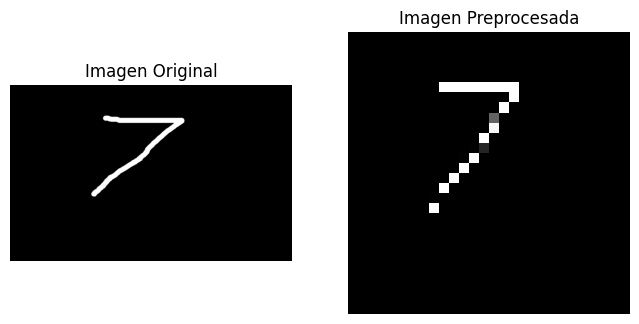

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
Dígito predicho: 2


In [39]:
import tensorflow as tf
import cv2
import numpy as np
from google.colab import drive
import os

def predict_digits_from_image_from_drive(image_path_drive, model_path_drive):

    try:
        # Montar Google Drive
        drive.mount('/content/drive')

        # Construir las rutas completas en Google Drive
        image_path = os.path.join('/content/drive/MyDrive/', image_path_drive)
        model_path = os.path.join('/content/drive/MyDrive/', model_path_drive)

        # Cargar el modelo entrenado
        model = tf.keras.models.load_model(model_path)

        # Leer la imagen en escala de grises
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        img = cv2.bitwise_not(img)

        # Verificar si la imagen se cargó correctamente
        if img is None:
            raise FileNotFoundError(f"No se pudo cargar la imagen desde: {image_path}")

        # Visualizar la imagen original
        plt.figure(figsize=(8, 4))
        plt.subplot(1, 2, 1)
        plt.imshow(img, cmap='gray')
        plt.title('Imagen Original')
        plt.axis('off')

        # Preprocesar la imagen
        img = cv2.resize(img, (28, 28))  # Redimensionar a 28x28
        img = img.astype('float32') / 255.0  # Normalizar
        img = img.reshape(1, 28, 28, 1)  # Agregar dimensiones de lote y canal

        # Visualizar la imagen preprocesada
        plt.subplot(1, 2, 2)
        plt.imshow(img[0, :, :, 0], cmap='gray')  # Mostrar la primera imagen del lote
        plt.title('Imagen Preprocesada')
        plt.axis('off')

        plt.show()  # Mostrar las imágenes

        # Realizar la predicción
        prediction = model.predict(img)

        # Obtener el dígito predicho
        predicted_digit = np.argmax(prediction)

        # Imprimir el resultado
        print(f"Dígito predicho: {predicted_digit}")

    except FileNotFoundError as e:
        print(f"Error: {e}")
    except Exception as e:
        print(f"Error inesperado: {e}")
    finally:
        drive.flush_and_unmount()

# Ejemplo de uso:
image_path_drive = 'Estudios/MasterIA/IAGen/Modelos/CasoUso2CNN/Imagenes Prueba/Prueba_7.jpg'  # Ruta relativa en tu Google Drive
model_path_drive = 'Estudios/MasterIA/IAGen/Modelos/CasoUso2CNN/modelCNNnum2.h5'  # Ruta relativa en tu Google Drive
predict_digits_from_image_from_drive(image_path_drive, model_path_drive)

--- Ejecutando para procesar todos los contornos sin filtros geométricos ---
Montando Google Drive...
Mounted at /content/drive
Google Drive montado.
Ruta de imagen: /content/drive/MyDrive/Estudios/MasterIA/IAGen/Modelos/CasoUso2CNN/Imagenes Prueba/Prueba_24837.jpg
Ruta de modelo: /content/drive/MyDrive/Estudios/MasterIA/IAGen/Modelos/CasoUso2CNN/modelCNNnum.h5
Cargando modelo...


Modelo cargado exitosamente.
Leyendo imagen...
Imagen cargada (Dimensiones originales: (902, 1459))
Intensidad promedio de la imagen original: 242.42
Fondo detectado como CLARO (promedio > 128). Invirtiendo colores.


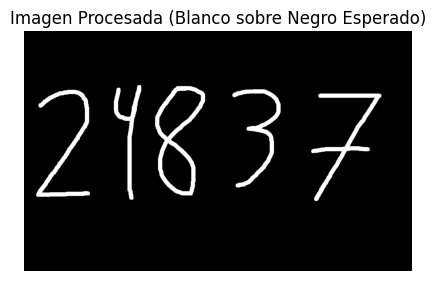

Segmentando todos los contornos...
Contornos encontrados inicialmente: 5

--- Procesando Contorno 1 ---
  Área=13410.0, Posición=(x:1080, y:235), Dimensiones=(w:264, h:405)
  Predicción: 7, Confianza: 80.25%
  PREDICCIÓN ACEPTADA.


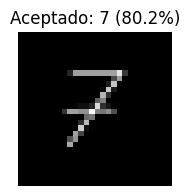


--- Procesando Contorno 2 ---
  Área=12299.0, Posición=(x:46, y:221), Dimensiones=(w:202, h:402)
  Predicción: 2, Confianza: 93.05%
  PREDICCIÓN ACEPTADA.


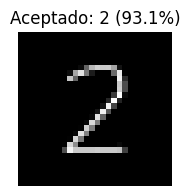


--- Procesando Contorno 3 ---
  Área=10321.0, Posición=(x:783, y:219), Dimensiones=(w:182, h:369)
  Predicción: 3, Confianza: 99.80%
  PREDICCIÓN ACEPTADA.


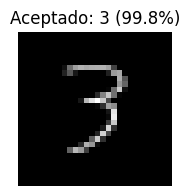


--- Procesando Contorno 4 ---
  Área=45713.0, Posición=(x:493, y:207), Dimensiones=(w:188, h:411)
  Predicción: 8, Confianza: 97.81%
  PREDICCIÓN ACEPTADA.


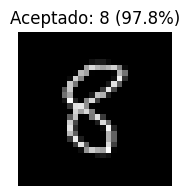


--- Procesando Contorno 5 ---
  Área=8998.0, Posición=(x:338, y:203), Dimensiones=(w:103, h:431)
  Predicción: 1, Confianza: 94.82%
  PREDICCIÓN ACEPTADA.


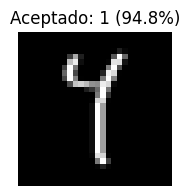


Dígitos finales predichos (todos los contornos, sin filtros geométricos): 21837

Resultado devuelto: '21837'


In [75]:
import tensorflow as tf
import cv2
import numpy as np
from google.colab import drive
import os
import matplotlib.pyplot as plt


# --- Parámetros ---
BACKGROUND_INTENSITY_THRESHOLD = 128


# --- Parámetros de Filtrado (para contornos individuales) ---
MIN_CONTOUR_AREA_DEFAULT = 10
CONFIDENCE_THRESHOLD_DEFAULT = 0.00
# ---------------------------------------------------------


def predict_digits_from_image_from_drive_process_all_unfiltered(
    image_path_drive,
    model_path_drive,
    background_threshold=BACKGROUND_INTENSITY_THRESHOLD,
    min_contour_area=MIN_CONTOUR_AREA_DEFAULT,
    confidence_threshold=CONFIDENCE_THRESHOLD_DEFAULT
):
    """
    Predice dígitos en todos los contornos encontrados en la imagen, sin filtros geométricos.
    """
    processed_image = None
    final_predictions = []
    try:
        # Montar Google Drive
        print("Montando Google Drive...")
        drive.mount('/content/drive', force_remount=True)
        print("Google Drive montado.")


        # Construir las rutas completas
        base_drive_path = '/content/drive/MyDrive/'
        image_path = os.path.join(base_drive_path, image_path_drive)
        model_path = os.path.join(base_drive_path, model_path_drive)


        print(f"Ruta de imagen: {image_path}")
        print(f"Ruta de modelo: {model_path}")


        # Cargar el modelo entrenado
        print("Cargando modelo...")
        model = tf.keras.models.load_model(model_path)
        print("Modelo cargado exitosamente.")


        # Leer la imagen en escala de grises
        print("Leyendo imagen...")
        img_original = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


        if img_original is None:
            raise ValueError(f"No se pudo cargar la imagen desde: {image_path}. cv2.imread devolvió None.")
        print(f"Imagen cargada (Dimensiones originales: {img_original.shape})")


        # --- Decidir si invertir colores ---
        avg_intensity = np.mean(img_original)
        print(f"Intensidad promedio de la imagen original: {avg_intensity:.2f}")


        if avg_intensity > background_threshold:
            print(f"Fondo detectado como CLARO (promedio > {background_threshold}). Invirtiendo colores.")
            processed_image = cv2.bitwise_not(img_original)
        else:
            print(f"Fondo detectado como OSCURO (promedio <= {background_threshold}). Usando colores originales.")
            processed_image = img_original


        if processed_image is None:
            raise ValueError("La imagen procesada es None.")


        # Mostrar la imagen procesada
        plt.figure(figsize=(5, 5))
        plt.imshow(processed_image, cmap='gray')
        plt.title('Imagen Procesada (Blanco sobre Negro Esperado)')
        plt.axis('off')
        plt.show()


        # --- Segmentación de Contornos Inicial ---
        print("Segmentando todos los contornos...")
        _, thresh_initial = cv2.threshold(processed_image, 127, 255, cv2.THRESH_BINARY)
        contours_initial, _ = cv2.findContours(thresh_initial, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        print(f"Contornos encontrados inicialmente: {len(contours_initial)}")


        digit_predictions = []
        # Procesar cada contorno encontrado
        for i_contour, contour in enumerate(contours_initial):
            area = cv2.contourArea(contour)
            if area >= min_contour_area:
                x, y, w, h = cv2.boundingRect(contour)


                print(f"\n--- Procesando Contorno {i_contour+1} ---")
                print(f"  Área={area:.1f}, Posición=(x:{x}, y:{y}), Dimensiones=(w:{w}, h:{h})")


                # Extraer el dígito ROI
                digit_img = processed_image[y:y + h, x:x + w]


                # Calcular el padding para centrar y evitar bordes (ligeramente aumentado)
                aspect_ratio = w / h if h > 0 else 1
                if aspect_ratio > 1: # Ancho mayor
                    padding = max(0, int(0.8 * h)) # Padding basado en la altura
                else: # Alto mayor o igual
                    padding = max(0, int(0.8 * w)) # Padding basado en el ancho


                pad_top = padding
                pad_bottom = padding
                pad_left = padding
                pad_right = padding


                digit_img_padded = cv2.copyMakeBorder(digit_img, pad_top, pad_bottom, pad_left, pad_right, cv2.BORDER_CONSTANT, value=0)


                try:
                    digit_img_resized = cv2.resize(digit_img_padded, (28, 28), interpolation=cv2.INTER_AREA)
                except cv2.error as e:
                    print(f"  Error al redimensionar: {e}. Saltando.")
                    continue


                digit_img_normalized = digit_img_resized.astype('float32') / 255.0
                digit_img_reshaped = digit_img_normalized.reshape(1, 28, 28, 1)


                # Predicción
                prediction = model.predict(digit_img_reshaped, verbose=0)
                predicted_digit = np.argmax(prediction)
                confidence = np.max(prediction)


                print(f"  Predicción: {predicted_digit}, Confianza: {confidence*100:.2f}%")


                if confidence >= confidence_threshold:
                    digit_predictions.append((x, predicted_digit, confidence)) # Guardar x para ordenar
                    print("  PREDICCIÓN ACEPTADA.")
                    # Mostrar imagen aceptada
                    plt.figure(figsize=(2, 2))
                    plt.imshow(digit_img_reshaped[0, :, :, 0], cmap='gray')
                    plt.title(f'Aceptado: {predicted_digit} ({confidence*100:.1f}%)')
                    plt.axis('off')
                    plt.show()
                else:
                    print("  PREDICCIÓN RECHAZADA por baja confianza.")


        # Ordenar las predicciones por su posición x
        sorted_predictions = sorted(digit_predictions, key=lambda item: item[0])
        final_predictions = [pred[1] for pred in sorted_predictions]
        final_prediction_string = "".join(map(str, final_predictions))


        print(f"\n===================================")
        print(f"Dígitos finales predichos (todos los contornos, sin filtros geométricos): {final_prediction_string if final_prediction_string else 'Ninguno'}")
        print(f"===================================")


        return final_prediction_string


    except FileNotFoundError as e:
        print(f"Error de Archivo: {e}")
    except ValueError as e:
        print(f"Error de Valor: {e}")
    except ImportError as e:
        print(f"Error de Importación: {e}. Verifica las librerías.")
    except Exception as e:
        print(f"Error inesperado: {e}")
        import traceback
        traceback.print_exc()
    finally:
        if 'drive' in locals() and 'google.colab.drive' in str(type(drive)) and os.path.ismount('/content/drive'):
            try:
                print("\nDesmontando Google Drive...")
                drive.flush_and_unmount()
                print("Google Drive desmontado.")
            except Exception as e:
                print(f"Advertencia: No se pudo desmontar Google Drive: {e}")


# --- Ejemplo de Uso ---
image_path_drive_test = 'Estudios/MasterIA/IAGen/Modelos/CasoUso2CNN/Imagenes Prueba/Prueba_24837.jpg' # Usando la imagen proporcionada
model_path_drive = 'Estudios/MasterIA/IAGen/Modelos/CasoUso2CNN/modelCNNnum.h5'


print("--- Ejecutando para procesar todos los contornos sin filtros geométricos ---")
predicted_string = predict_digits_from_image_from_drive_process_all_unfiltered(
    image_path_drive_test,
    model_path_drive
)
print(f"\nResultado devuelto: '{predicted_string}'")

--- Ejecutando segmentación por componentes con filtro de área e imagen inicial ---
Montando Google Drive...


Mounted at /content/drive
Imagen cargada (Dimensiones originales: (630, 417))


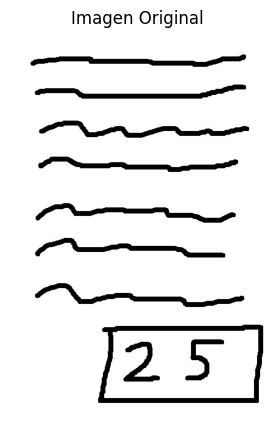


--- Procesando el Contorno Principal 1 ---
  Componentes conectados encontrados: 3
  -- Componente 2: Área=1239.0, Aspect=0.96, Extent=0.29
    PASÓ los filtros geométricos.
    Predicción: 5, Confianza: 100.00%
    PREDICCIÓN ACEPTADA.


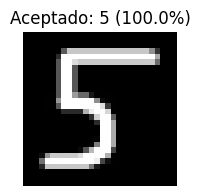

  -- Componente 3: Área=1368.0, Aspect=0.92, Extent=0.35
    PASÓ los filtros geométricos.
    Predicción: 2, Confianza: 100.00%
    PREDICCIÓN ACEPTADA.


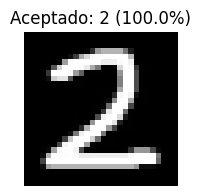


Dígitos finales predichos (filtrados por área de componente): 25

Resultado devuelto: '25'


In [29]:
import tensorflow as tf
import cv2
import numpy as np
from google.colab import drive
import os
import matplotlib.pyplot as plt

# --- Parámetros ---
BACKGROUND_INTENSITY_THRESHOLD = 128
MIN_CONTOUR_AREA_DEFAULT_COMPONENT = 50
MAX_CONTOUR_AREA_DEFAULT_COMPONENT = 1500
CONFIDENCE_THRESHOLD_DEFAULT = 0.80
MIN_ASPECT_RATIO_DEFAULT = 0.1
MAX_ASPECT_RATIO_DEFAULT = 6.0
MIN_EXTENT_DEFAULT = 0.1

def predict_digits_from_image_from_drive_filter_components_with_original(
    image_path_drive,
    model_path_drive,
    background_threshold=BACKGROUND_INTENSITY_THRESHOLD,
    min_component_area=MIN_CONTOUR_AREA_DEFAULT_COMPONENT,
    max_component_area=MAX_CONTOUR_AREA_DEFAULT_COMPONENT,
    confidence_threshold=CONFIDENCE_THRESHOLD_DEFAULT,
    min_aspect_ratio=MIN_ASPECT_RATIO_DEFAULT,
    max_aspect_ratio=MAX_ASPECT_RATIO_DEFAULT,
    min_extent=MIN_EXTENT_DEFAULT,
    process_top_n_contours=1
):
    processed_image = None
    final_predictions = []
    try:
        print("Montando Google Drive...")
        drive.mount('/content/drive', force_remount=True)
        base_drive_path = '/content/drive/MyDrive/'
        image_path = os.path.join(base_drive_path, image_path_drive)
        model_path = os.path.join(base_drive_path, model_path_drive)
        model = tf.keras.models.load_model(model_path)
        img_original = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        print(f"Imagen cargada (Dimensiones originales: {img_original.shape})")

        # Mostrar la imagen original
        plt.figure(figsize=(5, 5))
        plt.imshow(img_original, cmap='gray')
        plt.title('Imagen Original')
        plt.axis('off')
        plt.show()

        avg_intensity = np.mean(img_original)
        processed_image = cv2.bitwise_not(img_original) if avg_intensity > background_threshold else img_original

        _, thresh_initial = cv2.threshold(processed_image, 127, 255, cv2.THRESH_BINARY)
        contours_initial, _ = cv2.findContours(thresh_initial, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        filtered_main_contours = [c for c in contours_initial if cv2.contourArea(c) >= 50]
        sorted_main_contours = sorted(filtered_main_contours, key=cv2.contourArea, reverse=True)
        main_contours_to_process = sorted_main_contours[:process_top_n_contours]

        for i_main, main_contour in enumerate(main_contours_to_process):
            print(f"\n--- Procesando el Contorno Principal {i_main+1} ---")
            x_main, y_main, w_main, h_main = cv2.boundingRect(main_contour)
            roi_main = processed_image[y_main:y_main + h_main, x_main:x_main + w_main]
            roi_main_thresh = thresh_initial[y_main:y_main + h_main, x_main:x_main + w_main]

            connectivity = 4
            num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(roi_main_thresh, connectivity, cv2.CV_32S)

            print(f"  Componentes conectados encontrados: {num_labels - 1}")

            digit_predictions_roi = []
            for label in range(1, num_labels):
                area_comp = stats[label, cv2.CC_STAT_AREA]
                if min_component_area <= area_comp <= max_component_area:
                    mask = np.uint8(labels == label) * 255
                    component_contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

                    if component_contours:
                        contour_comp = max(component_contours, key=cv2.contourArea)
                        x_c, y_c, w_c, h_c = cv2.boundingRect(contour_comp)
                        x_abs = x_main + x_c
                        y_abs = y_main + y_c

                        aspect_ratio_comp = float(w_c) / h_c if h_c > 0 else 0
                        extent_comp = float(area_comp) / (w_c * h_c) if (w_c * h_c) > 0 else 0

                        print(f"  -- Componente {label}: Área={area_comp:.1f}, Aspect={aspect_ratio_comp:.2f}, Extent={extent_comp:.2f}")

                        if not (min_aspect_ratio <= aspect_ratio_comp <= max_aspect_ratio and extent_comp >= min_extent):
                            print("    RECHAZADO por filtros geométricos.")
                            continue
                        else:
                            print("    PASÓ los filtros geométricos.")

                        digit_img = roi_main[y_c:y_c + h_c, x_c:x_c + w_c]
                        pad = 10
                        digit_img_padded = cv2.copyMakeBorder(digit_img, pad, pad, pad, pad, cv2.BORDER_CONSTANT, value=0)

                        try:
                            digit_img_resized = cv2.resize(digit_img_padded, (28, 28), interpolation=cv2.INTER_AREA)
                        except cv2.error as e:
                            print(f"    Error al redimensionar: {e}. Saltando.")
                            continue

                        digit_img_normalized = digit_img_resized.astype('float32') / 255.0
                        digit_img_reshaped = digit_img_normalized.reshape(1, 28, 28, 1)

                        prediction = model.predict(digit_img_reshaped, verbose=0)
                        predicted_digit = np.argmax(prediction)
                        confidence = np.max(prediction)

                        print(f"    Predicción: {predicted_digit}, Confianza: {confidence*100:.2f}%")

                        if confidence >= confidence_threshold:
                            digit_predictions_roi.append((x_abs, predicted_digit, confidence))
                            print("    PREDICCIÓN ACEPTADA.")
                            plt.figure(figsize=(2, 2))
                            plt.imshow(digit_img_reshaped[0, :, :, 0], cmap='gray')
                            plt.title(f'Aceptado: {predicted_digit} ({confidence*100:.1f}%)')
                            plt.axis('off')
                            plt.show()
                        else:
                            print("    PREDICCIÓN RECHAZADA por baja confianza.")

            sorted_predictions_roi = sorted(digit_predictions_roi, key=lambda item: item[0])
            final_predictions.extend([pred[1] for pred in sorted_predictions_roi])

        final_prediction_string = "".join(map(str, final_predictions))

        print(f"\n===================================")
        print(f"Dígitos finales predichos (filtrados por área de componente): {final_prediction_string if final_prediction_string else 'Ninguno'}")
        print(f"===================================")

        return final_prediction_string

    except Exception as e:
        print(f"Error inesperado: {e}")
        import traceback
        traceback.print_exc()
        return None
    finally:
        if 'drive' in locals() and 'google.colab.drive' in str(type(drive)) and os.path.ismount('/content/drive'):
            drive.flush_and_unmount()
            print("Google Drive desmontado.")

# --- Ejemplo de Uso ---
image_path_drive_test = 'Estudios/MasterIA/IAGen/Modelos/CasoUso2CNN/Imagenes Prueba/Prueba_Receta1.jpg'
model_path_drive = 'Estudios/MasterIA/IAGen/Modelos/CasoUso2CNN/modelCNNnum.h5'

print("--- Ejecutando segmentación por componentes con filtro de área e imagen inicial ---")
predicted_string = predict_digits_from_image_from_drive_filter_components_with_original(
    image_path_drive_test,
    model_path_drive,
    process_top_n_contours=1
)
print(f"\nResultado devuelto: '{predicted_string}'")

In [48]:
import tensorflow as tf
from tensorflow.keras import layers, models

def conv_block(x, filters, kernel_size, strides=1):
    x = layers.Conv2D(filters, kernel_size, strides=strides, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU(alpha=0.1)(x)
    return x

def residual_block(x, filters):
    shortcut = x
    x = conv_block(x, filters // 2, 1)
    x = conv_block(x, filters, 3)
    x = layers.Add()([shortcut, x])
    x = layers.LeakyReLU(alpha=0.1)(x)
    return x

def darknet_like_model(input_shape=(28, 28, 1), num_classes=10):
    input_tensor = tf.keras.Input(shape=input_shape)
    x = conv_block(input_tensor, 32, 3)
    x = layers.MaxPool2D(2, 2)(x)

    x = conv_block(x, 64, 3)
    x = layers.MaxPool2D(2, 2)(x)

    x = conv_block(x, 128, 3)
    x = residual_block(x, 128)
    x = residual_block(x, 128)
    x = layers.MaxPool2D(2, 2)(x)

    x = conv_block(x, 256, 3)
    x = residual_block(x, 256)
    x = residual_block(x, 256)
    # No más MaxPool para mantener la resolución para la clasificación

    x = layers.GlobalAveragePooling2D()(x)
    output_tensor = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs=input_tensor, outputs=output_tensor)
    return model

# Crear el modelo
mnist_model = darknet_like_model()

# Compilar el modelo para clasificación MNIST
mnist_model.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

# Cargar y preprocesar el dataset MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Entrenar el modelo
mnist_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluar el modelo
loss, accuracy = mnist_model.evaluate(x_test, y_test, verbose=0)
print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

mnist_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 383s 199ms/step - accuracy: 0.9473 - loss: 0.1758 - val_accuracy: 0.9845 - val_loss: 0.0482
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 372s 198ms/step - accuracy: 0.9850 - loss: 0.0463 - val_accuracy: 0.9837 - val_loss: 0.0642
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 379s 197ms/step - accuracy: 0.9883 - loss: 0.0396 - val_accuracy: 0.9704 - val_loss: 0.1003
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 381s 203ms/step - accuracy: 0.9915 - loss: 0.0278 - val_accuracy: 0.9873 - val_loss: 0.0379
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 379s 202ms/step - accuracy: 0.9935 - loss: 0.0208 - val_accuracy: 0.9911 - val_loss: 0.0304
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 364s 194ms/step - accuracy: 0.9941 - loss: 0.0189 - val_accuracy: 0.9789 - val_loss: 0.0726
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 369s 197ms/step - accuracy: 0.9947 - loss: 0.0164 - val_accuracy: 0.9923 - val_loss: 0.0295
Epoch 8/10


Model: "functional_330"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 28, 28, 1)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 28, 28, 32)     │            288 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 28, 28, 32)     │            128 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu (LeakyReLU)   │ (None, 28, 28, 32)     │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 14, 14, 32)     │              0 │ leaky_re_lu[0][0]      │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 14, 14, 64)     │         18,432 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 14, 14, 64)     │            256 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_1 (LeakyReLU) │ (None, 14, 14, 64)     │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 7, 7, 64)       │              0 │ leaky_re_lu_1[0][0]    │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 7, 7, 128)      │         73,728 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 7, 7, 128)      │            512 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_2 (LeakyReLU) │ (None, 7, 7, 128)      │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 7, 7, 64)       │          8,192 │ leaky_re_lu_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 7, 7, 64)       │            256 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_3 (LeakyReLU) │ (None, 7, 7, 64)       │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 7, 7, 128)      │         73,728 │ leaky_re_lu_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4

 Total params: 3,640,448 (13.89 MB)

 Trainable params: 1,212,394 (4.62 MB)

 Non-trainable params: 3,264 (12.75 KB)

 Optimizer params: 2,424,790 (9.25 MB)

In [50]:
# Guardar el modelo entrenado
mnist_model.save('mnist_model.h5')

print("Modelo entrenado guardado como 'mnist_model.h5'")

Modelo entrenado guardado como 'mnist_model.h5'
